In [14]:
import h5py
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [15]:
import pyrootutils
root = pyrootutils.setup_root(search_from="/home/users/o/oleksiyu/WORK/skycurtains/transit/notebooks/evaluate_sky.ipynb", pythonpath=True, cwd=True, indicator=".project-root")

In [16]:
from src.data.gdr3_dataclasses import GDR3DatasetTop
from src.model.denseclassifier import run_classifier_folds
import transit.src.utils.plotting as pltt

In [17]:
full_run_path = '/home/users/o/oleksiyu/WORK/skycurtains/workspaces/TEST/TRANSITvSKYv5_SKY/'

In [18]:
SB1_gen = pd.read_hdf(full_run_path+"template/outputs/SB1_gen_sample.h5")
SB2_gen = pd.read_hdf(full_run_path+"template/outputs/SB2_gen_sample.h5")

In [19]:
# Load target data
dataset = GDR3DatasetTop(data_dir = "/srv/beegfs/scratch/groups/rodem/skycurtains/gaiadump/patches/",
    patch_name = "gaiascan_l146.2_b51.88_ra163.95_dec59.71",
    feature_list = ["latitudes", "longitudes", 
      "bp_rp",
      "phot_g_mean_mag",
      "pm_lon_coslat", #make sure the proper motions are always last - because they are used for the split
      "pm_lat"],
    context = "pm_lat",
    bins = [-36.0, -30.0, -24.0, -18.0],
    split_frac = 0,
    resample = False)

In [20]:
SB1_data = dataset.sb1_data
SB2_data = dataset.sb2_data

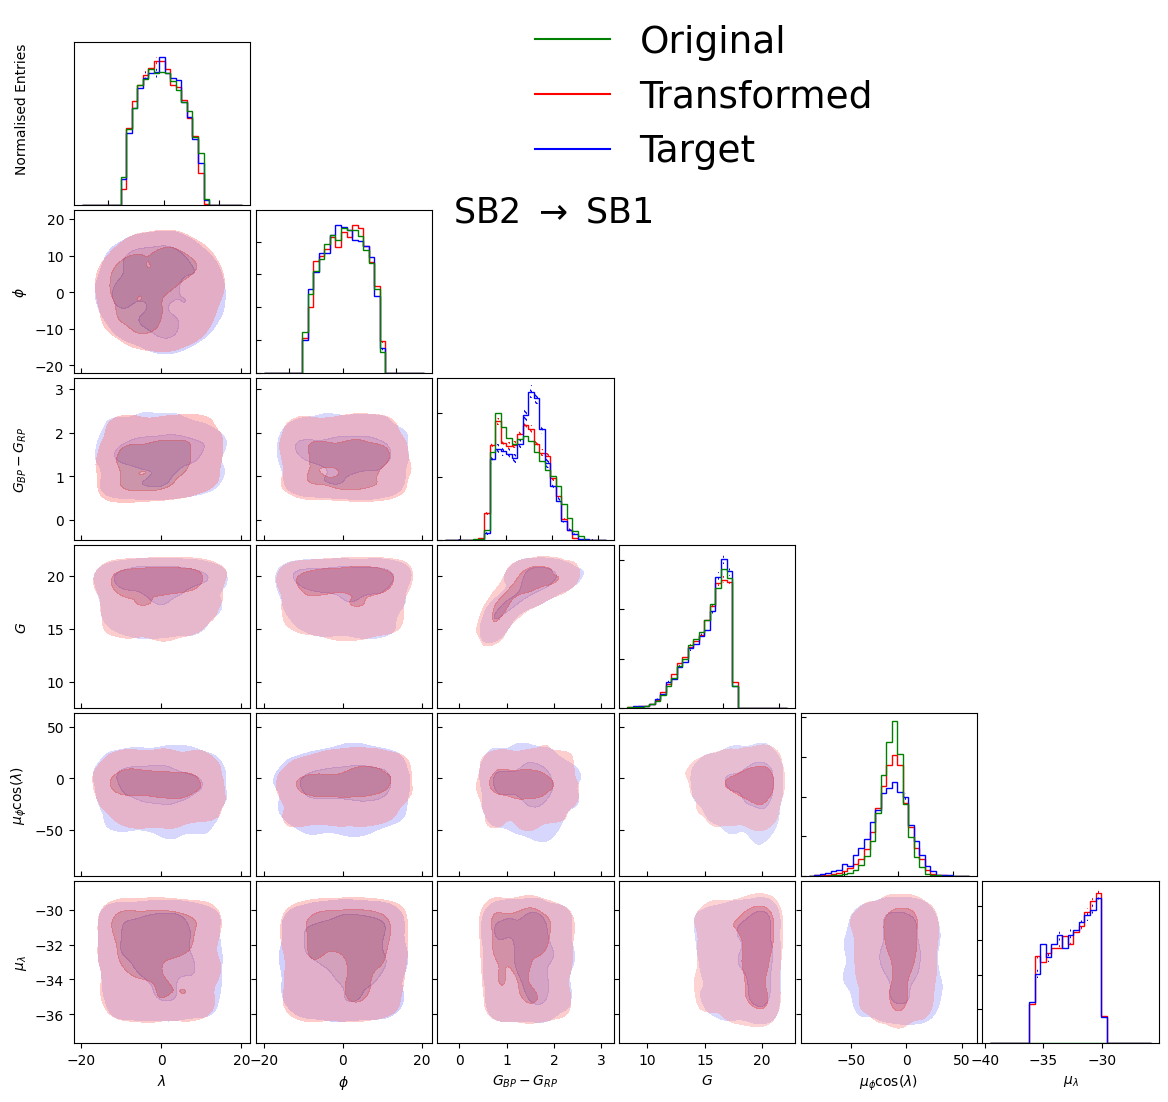

In [21]:
pltt.plot_feature_spread(
    SB1_data,
    SB1_gen.to_numpy(),
    original_data = SB2_data,
    feature_nms = SB1_gen.columns.to_list(),
    save_dir=Path(""),
    plot_mode="diagnose",
    x_bounds= [None, None],
    save_name="SB2_to_SB1",
    tag = ["SB2", "SB1"],
    nbins=30)

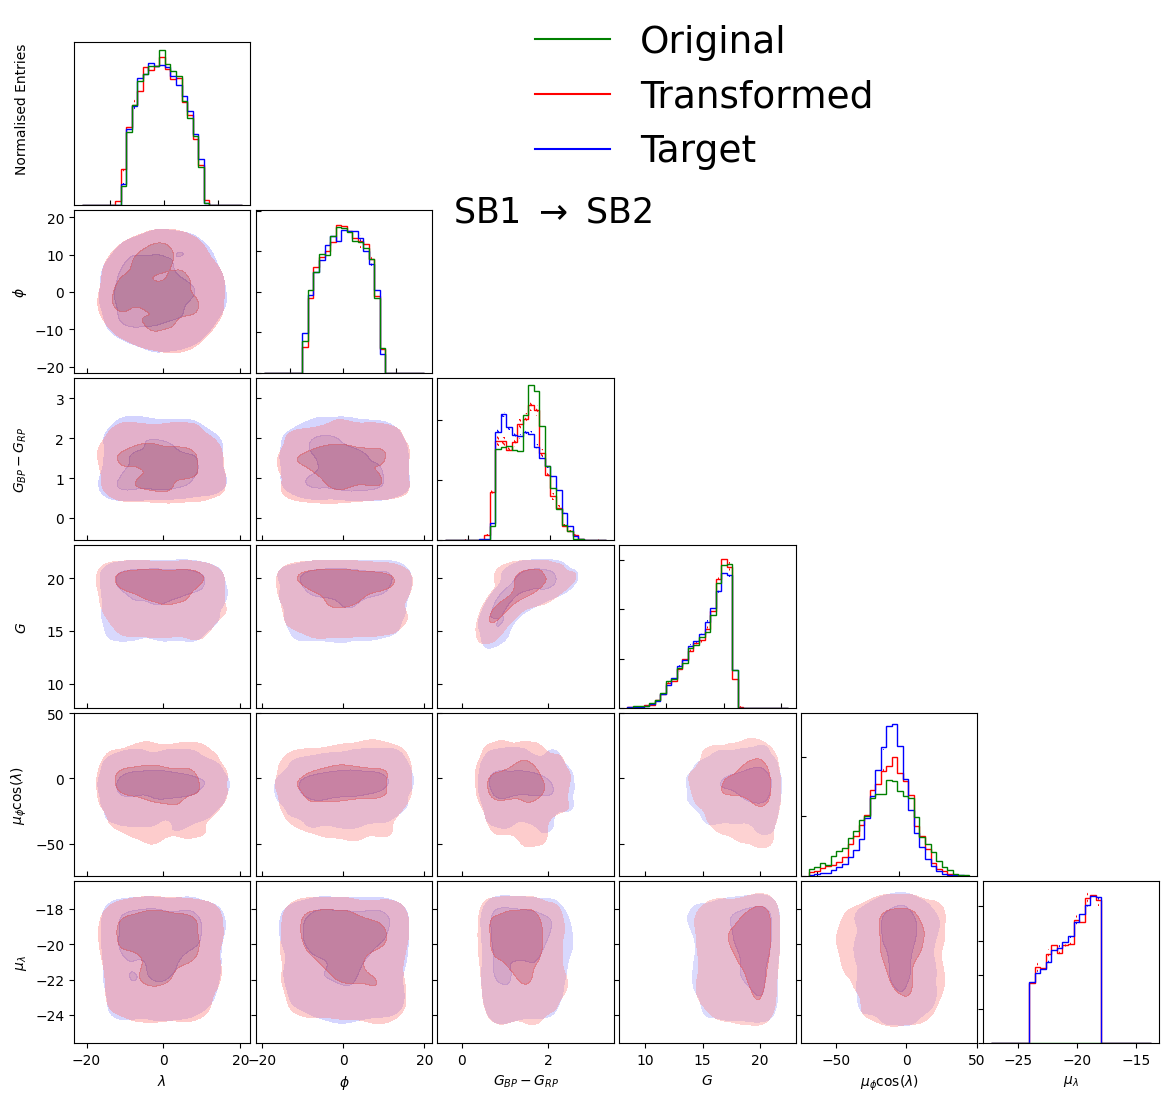

In [22]:
pltt.plot_feature_spread(
    SB2_data,
    SB2_gen.to_numpy(),
    original_data = SB1_data,
    feature_nms = SB1_gen.columns.to_list(),
    save_dir=Path(""),
    plot_mode="diagnose",
    x_bounds= [None, None],
    save_name="SB1_to_SB2",
    tag = ["SB1", "SB2"],
    nbins=30)

In [23]:
auc_score, threshold, data_preds = run_classifier_folds(
    true_samples=SB2_data[:, :-1], 
    template_samples=SB2_gen.to_numpy()[:, :-1],
    save_dir=Path(""),
    tag=f"sb1to2",
    return_threshold=False,  # if key == "sb12r" else False,
)

In [24]:
print(auc_score)

0.5710736155025963


In [25]:
auc_score, threshold, data_preds = run_classifier_folds(
    true_samples=SB1_data[:, :-1], 
    template_samples=SB1_gen.to_numpy()[:, :-1],
    save_dir=Path(""),
    tag=f"sb2to1",
    return_threshold=False,  # if key == "sb12r" else False,
)

In [26]:
print(auc_score)

0.5690070429007015
